<a href="https://colab.research.google.com/github/BhavikDudhrejiya/Recommender-System/blob/main/Movie_Recommender_System_Based_on_Content.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#IMPORTING LIBRARIES

In [37]:
import numpy as np
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet
import nltk
nltk.download('wordnet')
nltk.download('omw-1.4')
from sklearn.metrics.pairwise import cosine_similarity
import pickle

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Unzipping corpora/omw-1.4.zip.


True

# LOADING DATA

In [2]:
movies = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/tmdb_5000_movies.csv')
credits = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Dataset/tmdb_5000_credits.csv')

#DATA EXPLORATION

In [3]:
movies.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


In [4]:
credits.head()

,movie_id,title,cast,crew
0,19995,Avatar,"[{""cast_id"": 242, ""character"": ""Jake Sully"", ""...","[{""credit_id"": ""52fe48009251416c750aca23"", ""de..."
1,285,Pirates of the Caribbean: At World's End,"[{""cast_id"": 4, ""character"": ""Captain Jack Spa...","[{""credit_id"": ""52fe4232c3a36847f800b579"", ""de..."
2,206647,Spectre,"[{""cast_id"": 1, ""character"": ""James Bond"", ""cr...","[{""credit_id"": ""54805967c3a36829b5002c41"", ""de..."
3,49026,The Dark Knight Rises,"[{""cast_id"": 2, ""character"": ""Bruce Wayne / Ba...","[{""credit_id"": ""52fe4781c3a36847f81398c3"", ""de..."
4,49529,John Carter,"[{""cast_id"": 5, ""character"": ""John Carter"", ""c...","[{""credit_id"": ""52fe479ac3a36847f813eaa3"", ""de..."


# MERGING BOTH THE DATA

In [5]:
movies = pd.merge(movies, credits, left_on='id', right_on='movie_id')
movies.shape

(4803, 24)

# FEATURE SELECTION

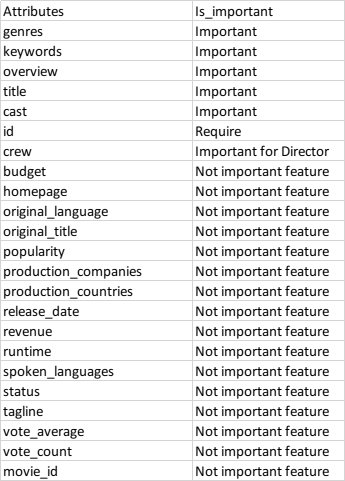

# CREATING NEW DATAFRAME WITH IMPORTANT FEATURES

In [12]:
movies = movies[['id', 'title_x', 'overview', 'genres', 'keywords', 'cast', 'crew']]

#CHECKING & REMOVING MISSING VALUES

In [14]:
movies.isnull().sum()

id          0
title_x     0
overview    3
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [15]:
movies.dropna(inplace=True)

/usr/local/lib/python3.7/dist-packages/pandas/util/_decorators.py:311: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return func(*args, **kwargs)


In [16]:
movies.isnull().sum()

id          0
title_x     0
overview    0
genres      0
keywords    0
cast        0
crew        0
dtype: int64

In [17]:
movies.shape

(4800, 7)

#CHECKING DUPLICATE

In [18]:
movies.duplicated().sum()

0

We require now three columns. movie_id, title, & tags

# FUNCTIONS

In [20]:
def parse_values(movies):
  genres = []
  for i in eval(movies):
    genres.append(i['name'])
  return genres

def parse_cast_values(movies):
  cast = []
  for i,j in enumerate(eval(movies)):
    if i<=2:
      cast.append(j['name'])
    else:
      break
  return cast

def parse_director_values(movies):
  director = []
  for i in eval(movies):
    if i['job']=='Director':
      director.append(i['name'])
      break
  return director

def lem(text):
  y = []
  for i in text.split():
    y.append(lemmatizer.lemmatize(i,wordnet.VERB))
  return " ".join(y)

def recommender(movies):
  movies_index = new_movies[new_movies['title_x']==movies].index[0]
  distances = similarity[movies_index]
  movies_list = sorted(list(enumerate(distances)), reverse=True, key=lambda x:x[1])[1:6]
  for i in movies_list:
    print(new_movies.iloc[i[0]].title_x)

# FEATURE ENGINEERING

In [21]:
movies['genres'] = movies['genres'].apply(parse_values)
movies['keywords'] = movies['keywords'].apply(parse_values)
movies['cast'] = movies['cast'].apply(parse_cast_values)
movies['crew'] = movies['crew'].apply(parse_director_values)
movies['overview'] = movies['overview'].apply(lambda x:x.split())
movies['genres'] = movies['genres'].apply(lambda x:[i.replace(' ','') for i in x])
movies['keywords'] = movies['keywords'].apply(lambda x:[i.replace(' ','') for i in x])
movies['cast'] = movies['cast'].apply(lambda x:[i.replace(' ','') for i in x])
movies['crew'] = movies['crew'].apply(lambda x:[i.replace(' ','') for i in x])
movies['tags'] = movies['overview']+movies['genres']+movies['keywords']+movies['cast']+movies['crew']

#CREATING NEW DATAFAME FOR MOVIES

In [28]:
new_movies = movies[['id','title_x','tags']]
new_movies['tags'] = new_movies['tags'].apply(lambda x:" ".join(x))
new_movies['tags'] = new_movies['tags'].apply(lambda x:x.lower())

In [31]:
new_movies.head()

,id,title_x,tags
0,19995,Avatar,"in the 22nd century, a paraplegic marine is di..."
1,285,Pirates of the Caribbean: At World's End,"captain barbossa, long believed to be dead, ha..."
2,206647,Spectre,a cryptic message from bond’s past sends him o...
3,49026,The Dark Knight Rises,following the death of district attorney harve...
4,49529,John Carter,"john carter is a war-weary, former military ca..."


#LEMMATIZATION

In [33]:
lemmatizer = WordNetLemmatizer()

In [38]:
new_movies['tags'] = new_movies['tags'].apply(lem)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


#TEXT VECTORIZATION

In [39]:
cv = CountVectorizer(max_features=5000, stop_words='english')

In [40]:
vectors = cv.fit_transform(new_movies['tags']).toarray()
vectors

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

#COMPUTE SIMILARITY SCORE

In [42]:
similarity = cosine_similarity(vectors)

# RECOMMEND MOVIES

In [44]:
recommender('Mortal Kombat')

Mortal Kombat: Annihilation
Lara Croft: Tomb Raider
Dragonslayer
The Hebrew Hammer
The Golden Child


# SAVING SIMILARITY SCORE IN PICKLE FORMAT

In [52]:
with open('similarity_pkl', 'wb') as files:
    pickle.dump(similarity, files)

#LOADING SIMILARITY SCORE PICKLE FILE

In [53]:
with open("similarity_pkl","rb") as f:
    similarity = pickle.load(f)